Iniciando a leitura do arquivo

In [2]:
import pandas as pd 
df = pd.read_csv("../data/vendas.csv", encoding="latin1")
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

Visualizando a relação entre desconto e Lucro

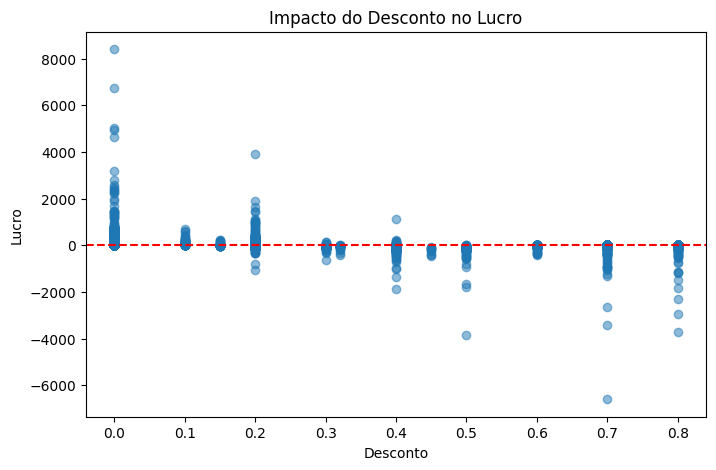

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(df['Discount'], df['Profit'], alpha=0.5)
plt.title('Impacto do Desconto no Lucro')
plt.xlabel('Desconto')
plt.ylabel('Lucro')
plt.axhline(0, color='red', linestyle='--')
plt.show()

Aqui ficou claro, que à medida que aumenta op desconto, o lucro vai reduzindo,ao ponto que se torna inviável a concessão de descontos.

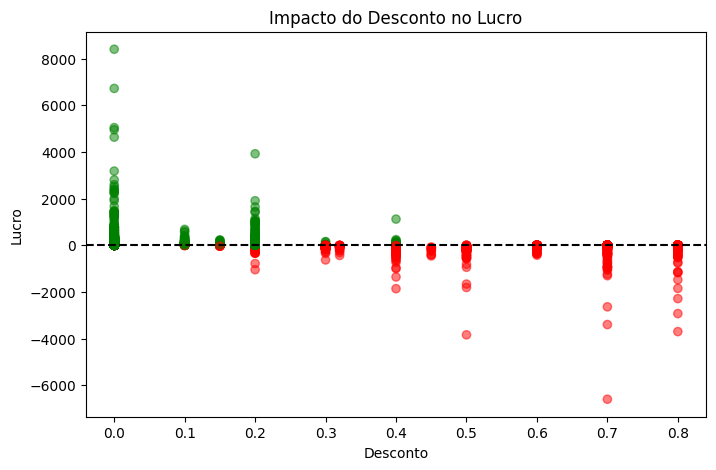

In [5]:
cores = df['Profit'].apply(lambda x: 'green' if x > 0 else 'red')

plt.figure(figsize=(8, 5))
plt.scatter(df['Discount'], df['Profit'], c=cores, alpha=0.5)
plt.title('Impacto do Desconto no Lucro')
plt.xlabel('Desconto')
plt.ylabel('Lucro')
plt.axhline(0, color='black', linestyle='--')
plt.show()

Com a visualização em cores fica mais claro a distinção.

In [6]:
correlacao = df['Discount'].corr(df['Profit'])
print(f'Correlação entre Desconto e Lucro: {correlacao:.2f}')

Correlação entre Desconto e Lucro: -0.22


In [7]:
import numpy as np
df['Lucro_Pos'] = df['Profit'] > 0
media_por_desconto = df.groupby('Discount')['Lucro_Pos'].mean()

ponto_critico = media_por_desconto[media_por_desconto < 0.5].index.min()
print(f"Ponto estimado onde mais de 50% das vendas começam a dar prejuízo: {ponto_critico}")

Ponto estimado onde mais de 50% das vendas começam a dar prejuízo: 0.3
